In [1]:
IS_COLAB = False
%load_ext autoreload
%autoreload 2

In [2]:
from libraries import *

Loading libraries...


2023-04-23 10:44:24.563004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Loaded libraries successfuly!


In [3]:
from dataset_loader import DataGenerator, DatasetManager

In [4]:
manager = DatasetManager()

In [5]:
loaded_data3 = manager.save_dataset_3()

2023-04-23 10:42:17.735598: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-23 10:42:17.737177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-23 10:42:17.794279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-23 10:42:17.794523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-04-23 10:42:17.794556: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-23 10:42:17.827523: I tensorflow/stream_executor/platform/de

In [6]:
len(loaded_data3[0])

372

In [7]:
loaded_data2 = manager.save_dataset_2()

2023-04-22 08:56:53.503432: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 207618048 exceeds 10% of free system memory.
2023-04-22 08:56:53.615510: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 311427072 exceeds 10% of free system memory.


In [6]:
loaded_data2 = manager.load_dataset_2()

In [7]:
datagen = DataGenerator(*loaded_data2)

In [7]:
# next(iter(datagen))
len(datagen)

12

In [77]:
for x in datagen:
    print(x[0].shape)

(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)
(8, 512, 512, 2)


### show data generator output

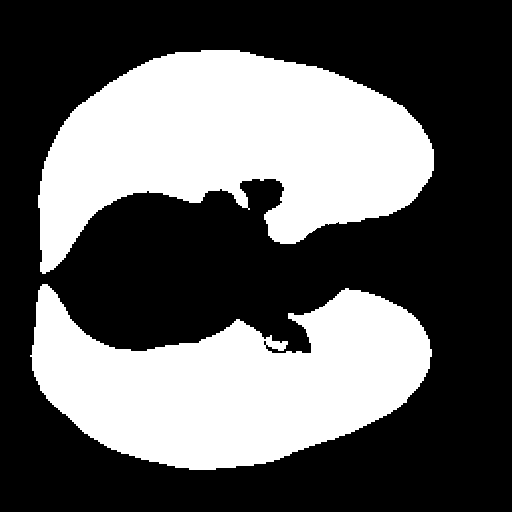

In [8]:
from PIL import Image as im

image = im.fromarray(datagen[1][0][1, :, :, 1].astype('uint8') * 255)
image

### Edit training loop

In [8]:
from train import Trainer

In [9]:
train_data, val_data, test_data = manager.split_data(loaded_data2, 'normal')

In [10]:
trainer = Trainer(train_data, val_data, test_data, n_classes = 2)

In [5]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""


In [13]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

RuntimeError: Physical devices cannot be modified after being initialized

In [11]:
trainer.train_simple_loop(10, 1, False, False)

2023-04-23 10:44:50.427638: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-23 10:44:50.445942: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-23 10:44:50.480852: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-23 10:44:50.480936: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Amir-Ali-Notebook
2023-04-23 10:44:50.480955: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Amir-Ali-Notebook
2023-04-23 10:44:50.481222: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.105.17
2023-04-23 10:44:50.481289: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.105.17
2023-04-23 10:44:50.481305: I tensorflo

(512, 512, 3)
[ 0.53786856 10.02363965 24.36299235]

Start of epoch 0


2023-04-23 10:44:52.588335: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 268435456 exceeds 10% of free system memory.
2023-04-23 10:44:52.678481: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.
2023-04-23 10:44:53.010219: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.
2023-04-23 10:44:53.094803: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.
2023-04-23 10:44:53.153706: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.


Training loss (for one batch) at step 0: 2.0686
Seen so far: 1 samples


KeyboardInterrupt: 